##                                    Loan Approval Project

In [2]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the dataset
df = pd.read_csv(r"D:\SQL_Projects\Loan_Approval_Classification\loan_approval_data.csv")

In [4]:
# checking the top 5 values of data
df.head(5)

,Person_Age,Person_Gender,Person_Education,Person_Income,Person_Emp_Exp,Person_Home_Ownership,Loan_Amnt,Loan_Intent,Loan_Int_Rate,Loan_Percent_Income,Cb_Person_Cred_Hist_Length,Credit_Score,Previous_Loan_Defaults_On_File,Loan_Status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [5]:
# checking null values in dataset
df.isnull().sum()

Person_Age                        0
Person_Gender                     0
Person_Education                  0
Person_Income                     0
Person_Emp_Exp                    0
Person_Home_Ownership             0
Loan_Amnt                         0
Loan_Intent                       0
Loan_Int_Rate                     0
Loan_Percent_Income               0
Cb_Person_Cred_Hist_Length        0
Credit_Score                      0
Previous_Loan_Defaults_On_File    0
Loan_Status                       0
dtype: int64

In [6]:
# no null values were found in dataset

In [7]:
df.head(2)

,Person_Age,Person_Gender,Person_Education,Person_Income,Person_Emp_Exp,Person_Home_Ownership,Loan_Amnt,Loan_Intent,Loan_Int_Rate,Loan_Percent_Income,Cb_Person_Cred_Hist_Length,Credit_Score,Previous_Loan_Defaults_On_File,Loan_Status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0


In [8]:
df.shape

(45000, 14)

In [9]:
df.columns

Index(['Person_Age', 'Person_Gender', 'Person_Education', 'Person_Income',
       'Person_Emp_Exp', 'Person_Home_Ownership', 'Loan_Amnt', 'Loan_Intent',
       'Loan_Int_Rate', 'Loan_Percent_Income', 'Cb_Person_Cred_Hist_Length',
       'Credit_Score', 'Previous_Loan_Defaults_On_File', 'Loan_Status'],
      dtype='object')

In [10]:
df.corr(numeric_only = True)

,Person_Age,Person_Income,Person_Emp_Exp,Loan_Amnt,Loan_Int_Rate,Loan_Percent_Income,Cb_Person_Cred_Hist_Length,Credit_Score,Loan_Status
Person_Age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
Person_Income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
Person_Emp_Exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
Loan_Amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
Loan_Int_Rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
Loan_Percent_Income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
Cb_Person_Cred_Hist_Length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
Credit_Score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
Loan_Status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


<Axes: >

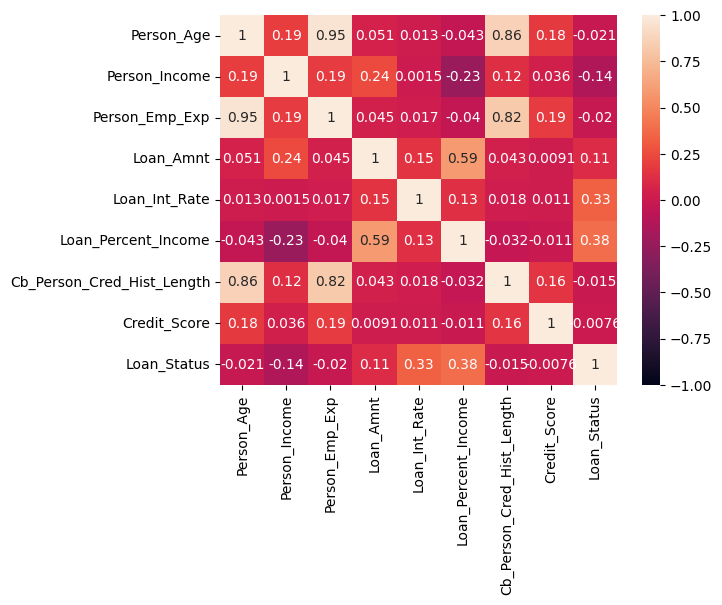

In [11]:
sns.heatmap(df.corr(numeric_only = True), vmin = -1, vmax = 1, annot= True)

In [12]:
num_cols = ['Person_Age','Person_Income','Person_Emp_Exp','Loan_Amnt','Loan_Int_Rate','Loan_Percent_Income','Cb_Person_Cred_Hist_Length','Credit_Score']

In [13]:
cat_cols = ['Person_Gender','Person_Education','Person_Home_Ownership','Loan_Intent','Previous_Loan_Defaults_On_File','Loan_Status']

## Univariate Analysis
* Numerical Variables

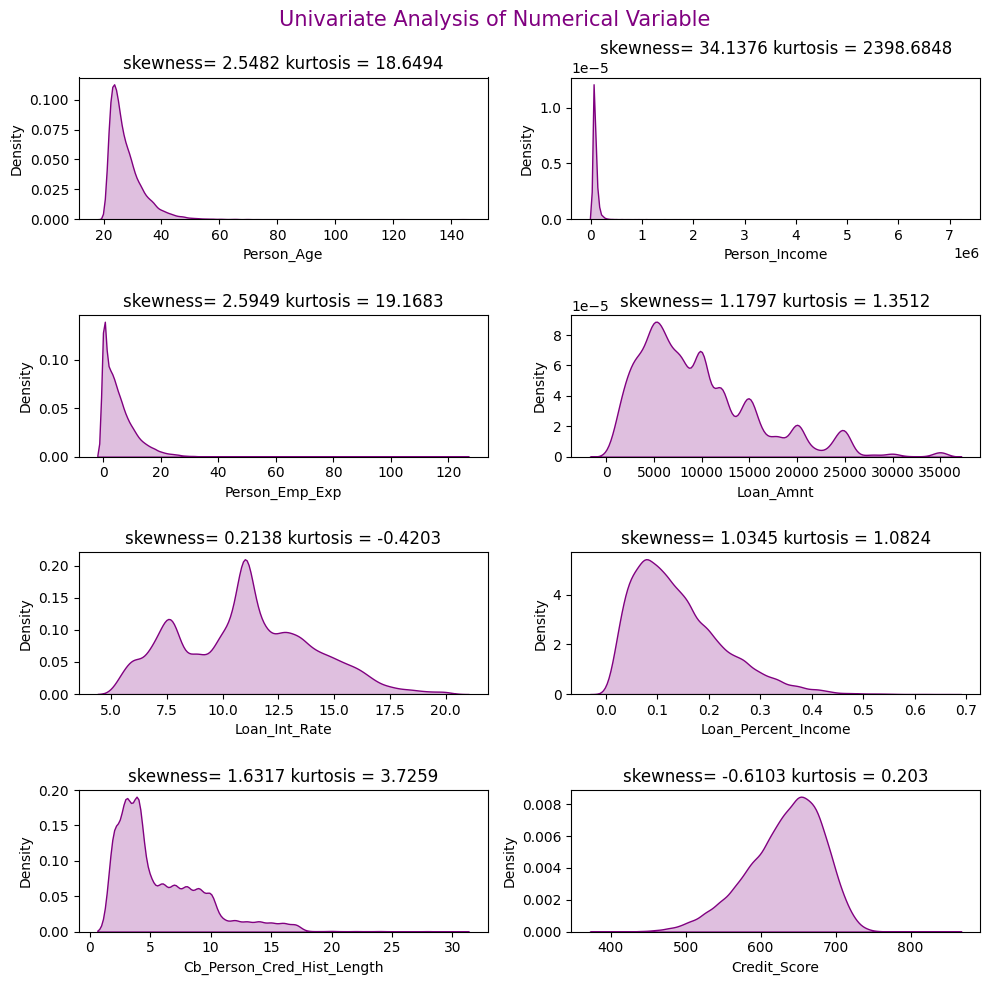

In [14]:
t = 1
plt.figure(figsize = (10,10))
plt.suptitle('Univariate Analysis of Numerical Variable', color = 'Purple', size = 15)
for i in num_cols:
    s = df[i].skew()
    k = df[i].kurt()
    plt.subplot(4,2,t)
    sns.kdeplot(df, x = i, color = 'Purple', fill = True)
    plt.title(f'skewness= {round(s,4)} kurtosis = {round(k,4)}')
    t = t+1
plt.tight_layout()
plt.show()

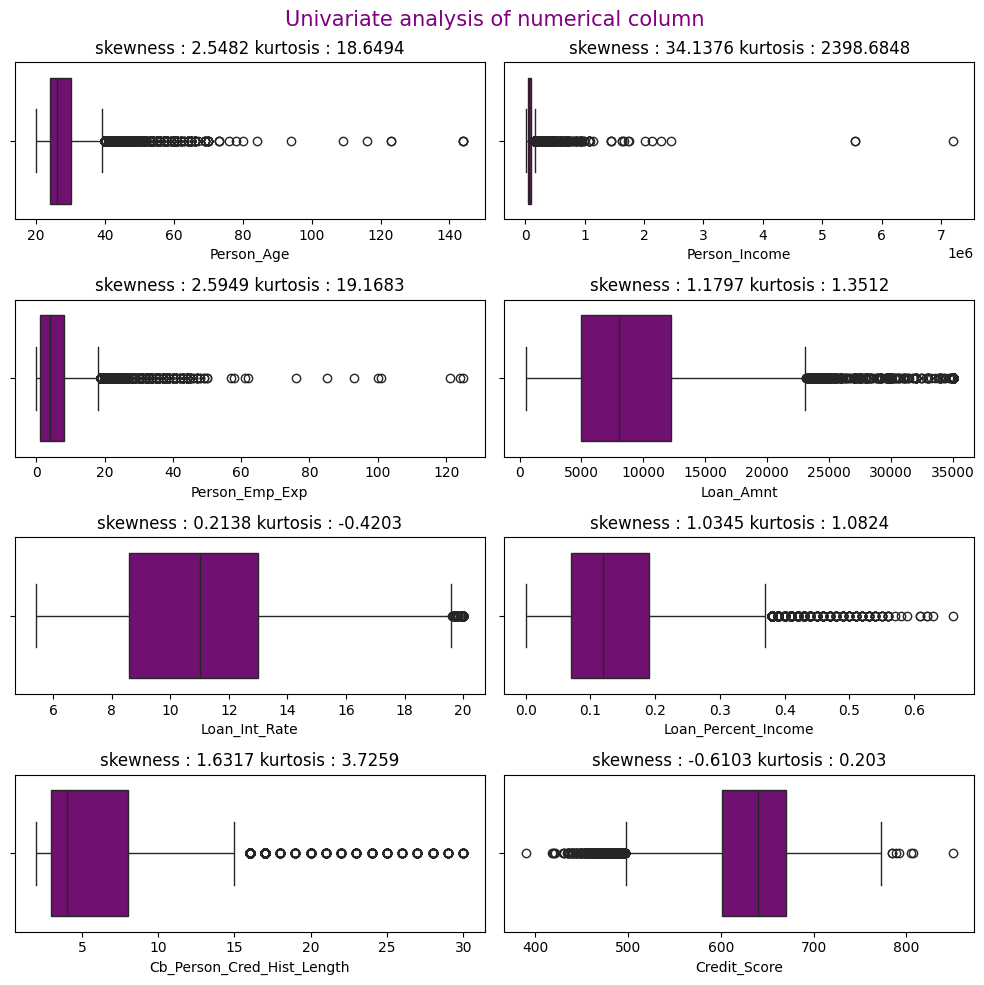

In [15]:
t = 1
plt.figure(figsize = (10,10))
plt.suptitle('Univariate analysis of numerical column', color = 'Purple', size =15)
for i in num_cols:
    plt.subplot(4,2,t)
    s = df[i].skew()
    k = df[i].kurt()
    sns.boxplot(df, x = i, color = 'Purple')
    plt.title(f'skewness : {round(s,4)} kurtosis : {round(k,4)}')
    t = t+1
plt.tight_layout()
plt.show()

* Categorical Variables

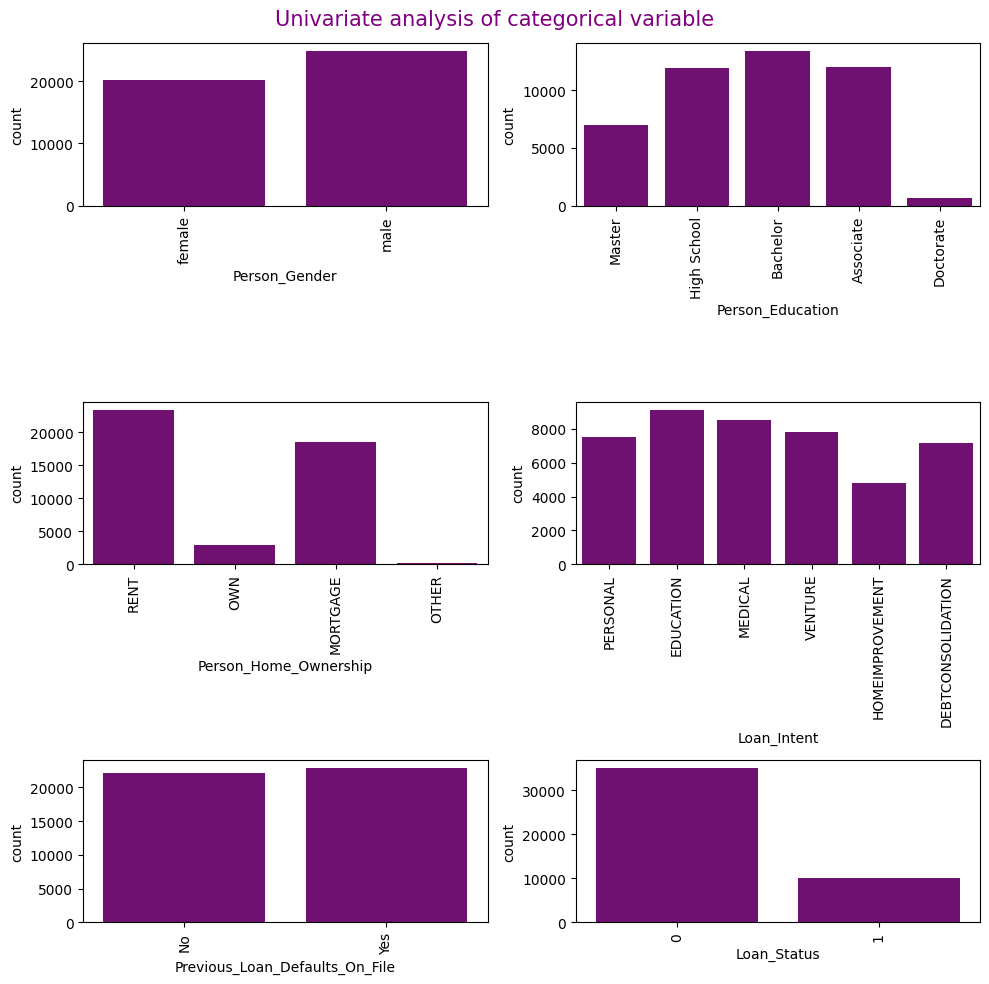

In [16]:
t = 1
plt.figure(figsize = (10,10))
plt.suptitle('Univariate analysis of categorical variable', color = 'Purple', size = 15)
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.countplot(df, x = i, color = 'Purple')
    plt.xticks(rotation = 90)
    t = t+1
plt.tight_layout()
plt.show()

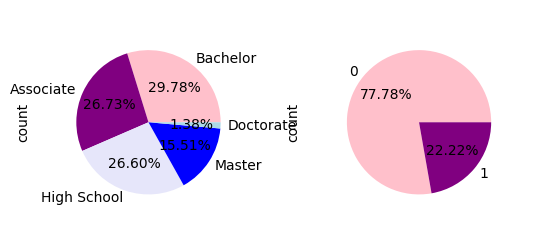

In [17]:
t = 1
for i in ['Person_Education', 'Loan_Status']:
    plt.subplot(1,2,t)
    df[i].value_counts().plot(kind= 'pie', radius = 0.8, autopct = '%0.2f%%', colors = ['Pink','Purple','Lavender','Blue','Lightblue'])
    t = t+1

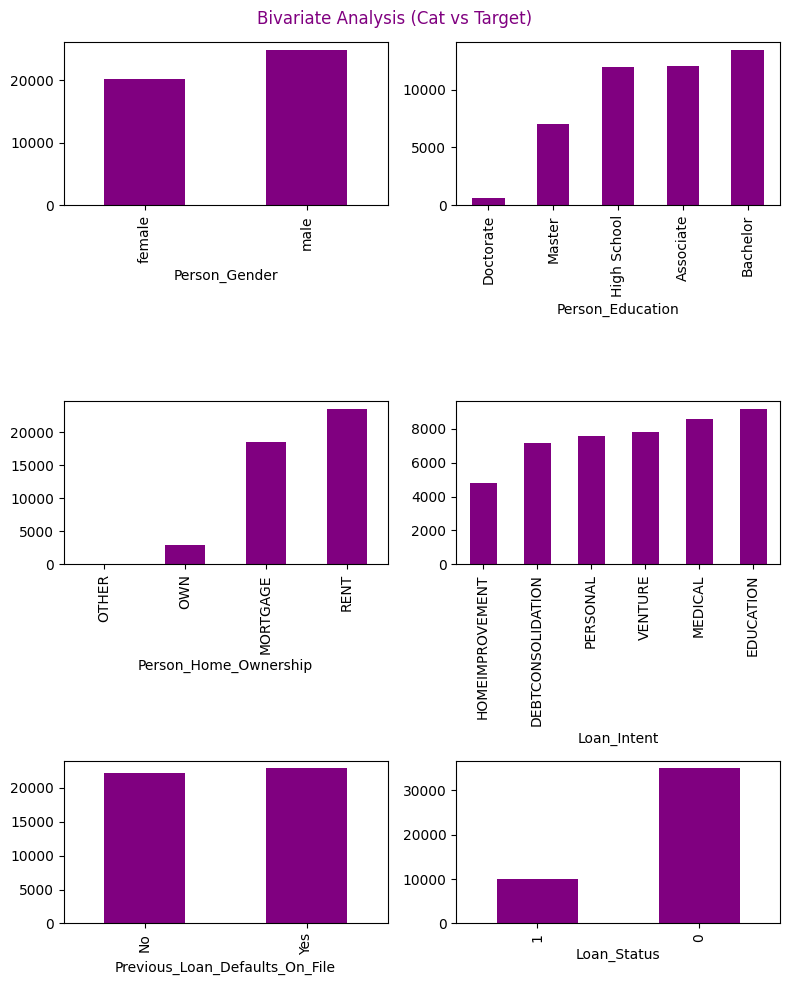

In [18]:
t =1
plt.figure(figsize = (8,10))
plt.suptitle('Bivariate Analysis (Cat vs Target)', color = 'purple')
for i in cat_cols:
    plt.subplot(3,2,t)
    df.groupby(i)['Loan_Status'].count().sort_values().plot(kind = 'bar', color = 'purple')
    i != 'Loan_Status'
    t += 1
plt.tight_layout()
plt.show()

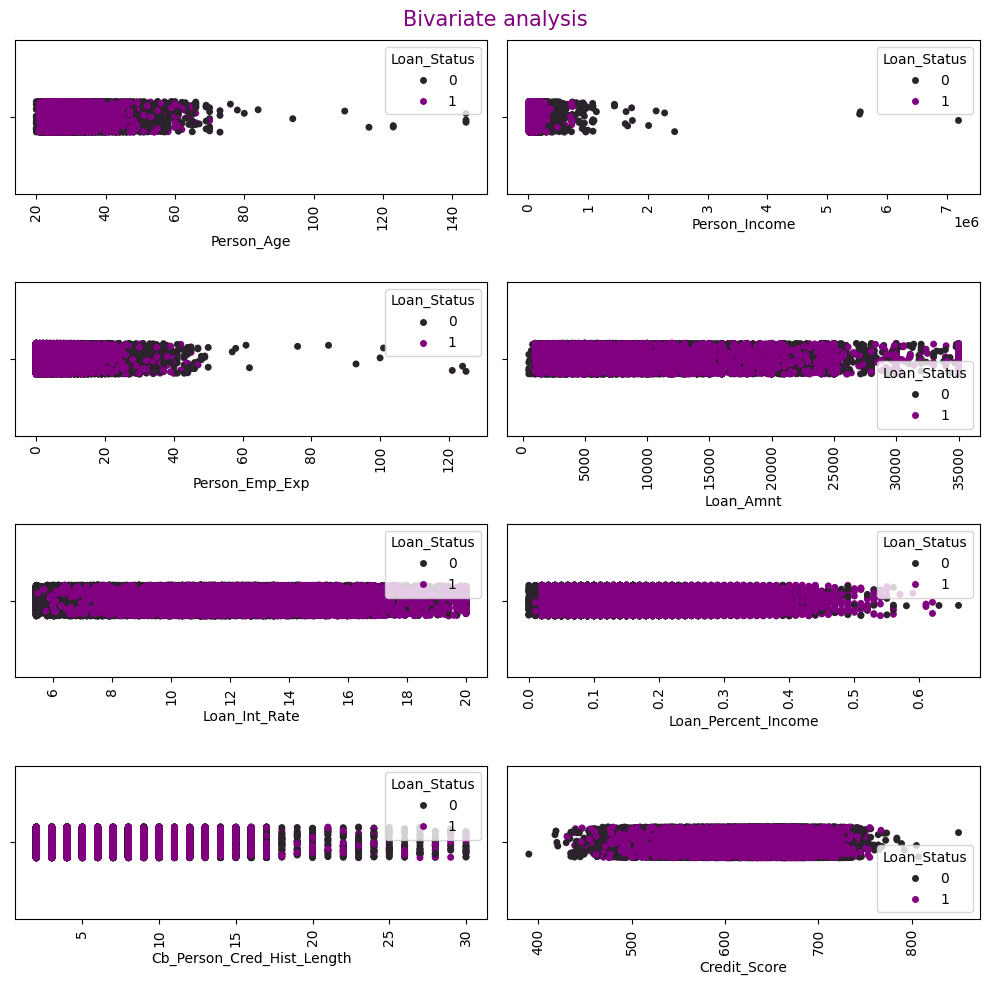

In [19]:
t = 1
plt.figure(figsize = (10,10))
plt.suptitle('Bivariate analysis', color = 'Purple', size = 15)
for i in num_cols:
    plt.subplot(4,2,t)
    sns.stripplot(df, x =i, hue = 'Loan_Status', color = 'Purple')
    plt.xticks(rotation = 90)
    t = t+1
plt.tight_layout()
plt.show()

## Missing Value

In [20]:
df.isnull().sum()

Person_Age                        0
Person_Gender                     0
Person_Education                  0
Person_Income                     0
Person_Emp_Exp                    0
Person_Home_Ownership             0
Loan_Amnt                         0
Loan_Intent                       0
Loan_Int_Rate                     0
Loan_Percent_Income               0
Cb_Person_Cred_Hist_Length        0
Credit_Score                      0
Previous_Loan_Defaults_On_File    0
Loan_Status                       0
dtype: int64

## Outlier Identification
* Using IQR method

In [21]:
for i in num_cols:
    q1, q3 = df[i].quantile([0.25,0.75])
    IQR = q3-q1
    ll = q1-1.5*IQR
    ul = q3+1.5*IQR
# identify the datapoints beyond and below IQR
df[(df[i]>ul)|(df[i]<ll)]

,Person_Age,Person_Gender,Person_Education,Person_Income,Person_Emp_Exp,Person_Home_Ownership,Loan_Amnt,Loan_Intent,Loan_Int_Rate,Loan_Percent_Income,Cb_Person_Cred_Hist_Length,Credit_Score,Previous_Loan_Defaults_On_File,Loan_Status
81,144,male,Bachelor,300616,125,RENT,4800,VENTURE,13.57,0.02,3,789,No,0
172,25,male,High School,75504,4,RENT,25000,MEDICAL,12.73,0.33,2,484,No,1
183,144,male,Associate,241424,121,MORTGAGE,6000,EDUCATION,11.86,0.02,2,807,No,0
353,23,female,High School,19859,0,OWN,2000,PERSONAL,6.39,0.10,3,491,Yes,0
575,123,female,High School,97140,101,RENT,20400,EDUCATION,10.25,0.21,3,805,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44618,28,female,Bachelor,59767,7,RENT,15000,MEDICAL,13.67,0.25,5,492,No,1
44676,24,female,Associate,37217,1,RENT,5000,EDUCATION,12.95,0.13,2,462,No,1
44754,25,male,High School,86195,3,RENT,2636,DEBTCONSOLIDATION,15.04,0.03,3,488,No,1
44954,25,female,High School,19819,1,RENT,3245,EDUCATION,12.10,0.16,4,482,No,1


In [22]:
for i in num_cols:
    q1, q3 = df[i].quantile([0.25,0.75])
    IQR = q3-q1
    ll = q1-1.5*IQR
    ul = q3+1.5*IQR
    df[i] = df[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

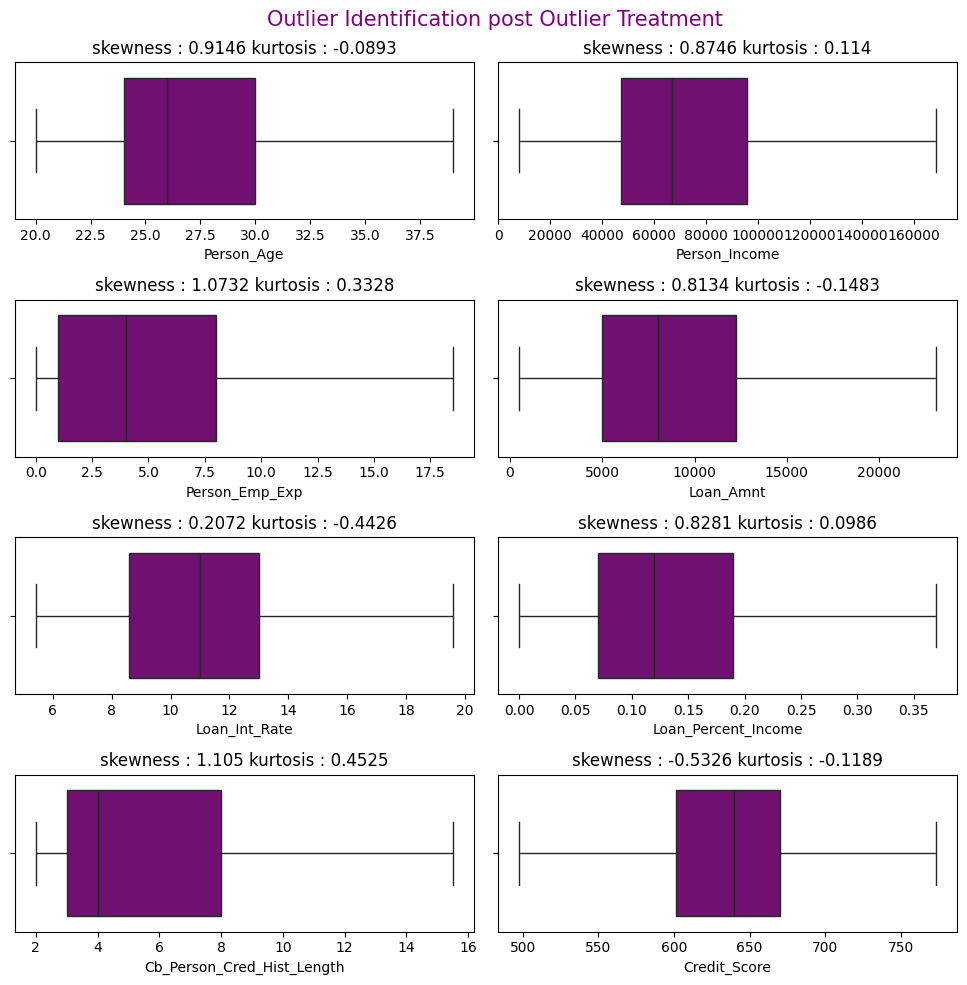

In [23]:
t = 1
plt.figure(figsize = (10,10))
plt.suptitle('Outlier Identification post Outlier Treatment', color = 'Purple', size =15)
for i in num_cols:
    plt.subplot(4,2,t)
    s = df[i].skew()
    k = df[i].kurt()
    sns.boxplot(df, x = i, color = 'Purple')
    plt.title(f'skewness : {round(s,4)} kurtosis : {round(k,4)}')
    t = t+1
plt.tight_layout()
plt.show()

## Checking Duplicates in Data

In [24]:
df[df.duplicated()]

,Person_Age,Person_Gender,Person_Education,Person_Income,Person_Emp_Exp,Person_Home_Ownership,Loan_Amnt,Loan_Intent,Loan_Int_Rate,Loan_Percent_Income,Cb_Person_Cred_Hist_Length,Credit_Score,Previous_Loan_Defaults_On_File,Loan_Status


## Statistical Hypothesis Testing

In [25]:
import statsmodels.formula.api as sfa
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [26]:
f_stats = stats.f.isf(0.05,  dfn = 13, dfd = 629987)

In [27]:
f_stats

1.720171857611152

In [28]:
model = sfa.ols('Loan_Status~Person_Age+Person_Income+Person_Emp_Exp+Loan_Amnt+Loan_Int_Rate+Loan_Percent_Income+Cb_Person_Cred_Hist_Length', data = df).fit()
print(anova_lm(model))

                                 df       sum_sq     mean_sq            F  \
Person_Age                      1.0     5.124039    5.124039    40.458910   
Person_Income                   1.0   478.109381  478.109381  3775.104557   
Person_Emp_Exp                  1.0     0.170028    0.170028     1.342528   
Loan_Amnt                       1.0   412.832815  412.832815  3259.687228   
Loan_Int_Rate                   1.0   672.413781  672.413781  5309.312955   
Loan_Percent_Income             1.0   510.837622  510.837622  4033.523526   
Cb_Person_Cred_Hist_Length      1.0     0.144027    0.144027     1.137221   
Residual                    44992.0  5698.146085    0.126648          NaN   

                                  PR(>F)  
Person_Age                  2.027185e-10  
Person_Income               0.000000e+00  
Person_Emp_Exp              2.465948e-01  
Loan_Amnt                   0.000000e+00  
Loan_Int_Rate               0.000000e+00  
Loan_Percent_Income         0.000000e+00  
Cb_Pe

In [29]:
df['Credit_Score'] = df['Credit_Score'].map(lambda x: 'Low' if x<=600 else 'Doubtfull' if x<=649 else 'Fair' if x<=699 else 'Good')

In [30]:
df.head(3)

,Person_Age,Person_Gender,Person_Education,Person_Income,Person_Emp_Exp,Person_Home_Ownership,Loan_Amnt,Loan_Intent,Loan_Int_Rate,Loan_Percent_Income,Cb_Person_Cred_Hist_Length,Credit_Score,Previous_Loan_Defaults_On_File,Loan_Status
0,22.0,female,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,Low,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.000,EDUCATION,11.14,0.08,2.0,Low,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.37,3.0,Doubtfull,No,1


<Axes: xlabel='Credit_Score'>

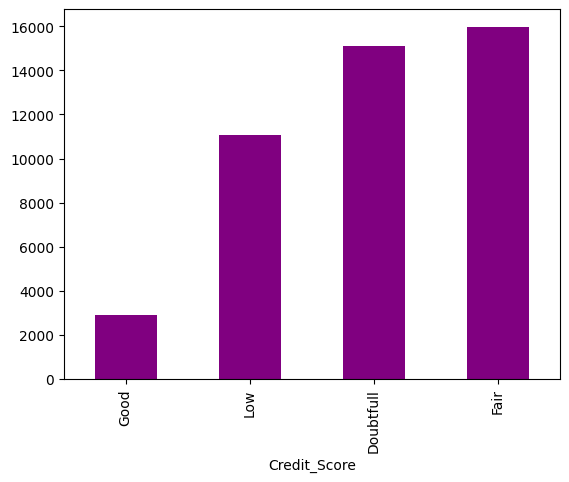

In [31]:
df.groupby(by = 'Credit_Score')['Loan_Status'].count().sort_values(ascending = True).plot(kind = 'bar', color = 'purple')

In [32]:
'Person_Gender','Person_Education','Person_Home_Ownership','Loan_Intent','Previous_Loan_Defaults_On_File'

('Person_Gender',
 'Person_Education',
 'Person_Home_Ownership',
 'Loan_Intent',
 'Previous_Loan_Defaults_On_File')

In [33]:
df1 = pd.crosstab(index = df['Loan_Status'], columns = df['Person_Gender'])

In [34]:
df2 = pd.crosstab(index = df['Loan_Status'], columns = df['Person_Education'])

In [35]:
df3 = pd.crosstab(index = df['Loan_Status'], columns = df['Person_Home_Ownership'])

In [36]:
df4 = pd.crosstab(index = df['Loan_Status'], columns = df['Loan_Intent'])

In [37]:
df5 = pd.crosstab(index = df['Loan_Status'], columns = df['Previous_Loan_Defaults_On_File'])

In [38]:
df6 = pd.crosstab(index = df['Loan_Status'], columns = df['Credit_Score'])

In [39]:
print(stats.chi2_contingency(df1))
print(stats.chi2_contingency(df2))
print(stats.chi2_contingency(df3))
print(stats.chi2_contingency(df4))
print(stats.chi2_contingency(df5))
print(stats.chi2_contingency(df6))

Chi2ContingencyResult(statistic=0.011593759269277155, pvalue=0.9142540404277906, dof=1, expected_freq=array([[15679.22222222, 19320.77777778],
       [ 4479.77777778,  5520.22222222]]))
Chi2ContingencyResult(statistic=2.0159398837088074, pvalue=0.732826935503778, dof=4, expected_freq=array([[ 9355.11111111, 10421.44444444,   483.        ,  9311.55555556,
         5428.88888889],
       [ 2672.88888889,  2977.55555556,   138.        ,  2660.44444444,
         1551.11111111]]))
Chi2ContingencyResult(statistic=2989.5147066749823, pvalue=0.0, dof=3, expected_freq=array([[14380.33333333,    91.        ,  2295.22222222, 18233.44444444],
       [ 4108.66666667,    26.        ,   655.77777778,  5209.55555556]]))
Chi2ContingencyResult(statistic=909.6476783138057, pvalue=2.1730841870538932e-194, dof=5, expected_freq=array([[5557.22222222, 7119.        , 3720.11111111, 6648.44444444,
        5873.77777778, 6081.44444444],
       [1587.77777778, 2034.        , 1062.88888889, 1899.55555556,
       

<Axes: xlabel='Loan_Status', ylabel='count'>

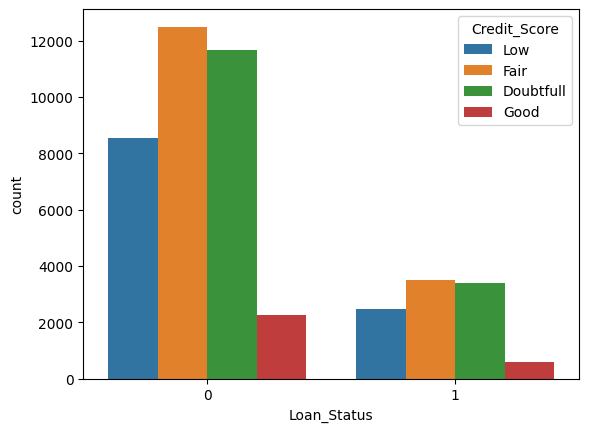

In [40]:
sns.countplot(x= df['Loan_Status'],hue = df['Credit_Score'])

In [41]:
df.head(1)

,Person_Age,Person_Gender,Person_Education,Person_Income,Person_Emp_Exp,Person_Home_Ownership,Loan_Amnt,Loan_Intent,Loan_Int_Rate,Loan_Percent_Income,Cb_Person_Cred_Hist_Length,Credit_Score,Previous_Loan_Defaults_On_File,Loan_Status
0,22.0,female,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,Low,No,1


In [42]:
m_cols = ['Person_Age','Person_Income','Loan_Amnt','Loan_Int_Rate','Loan_Percent_Income','Person_Home_Ownership','Loan_Intent','Previous_Loan_Defaults_On_File','Loan_Status']

In [43]:
dfm = df[m_cols]

In [44]:
dfm.head()

,Person_Age,Person_Income,Loan_Amnt,Loan_Int_Rate,Loan_Percent_Income,Person_Home_Ownership,Loan_Intent,Previous_Loan_Defaults_On_File,Loan_Status
0,22.0,71948.0,23093.125,16.02,0.37,RENT,PERSONAL,No,1
1,21.0,12282.0,1000.000,11.14,0.08,OWN,EDUCATION,Yes,0
2,25.0,12438.0,5500.000,12.87,0.37,MORTGAGE,MEDICAL,No,1
3,23.0,79753.0,23093.125,15.23,0.37,RENT,MEDICAL,No,1
4,24.0,66135.0,23093.125,14.27,0.37,RENT,MEDICAL,No,1


In [50]:
dfm['Person_Home_Ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [48]:
dfm['Loan_Intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [49]:
dfm['Previous_Loan_Defaults_On_File'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
dfm = pd.get_dummies(dfm, columns = ['Person_Home_Ownership','Previous_Loan_Defaults_On_File'], drop_first=True, dtype=int)

In [53]:
dfm['Loan_Intent'] = dfm['Loan_Intent'].map(dfm['Loan_Intent'].value_counts(normalize=True).to_dict())

### Splitting the data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
dfm.head(1)

,Person_Age,Person_Income,Loan_Amnt,Loan_Int_Rate,Loan_Percent_Income,Loan_Intent,Loan_Status,Person_Home_Ownership_OTHER,Person_Home_Ownership_OWN,Person_Home_Ownership_RENT,Previous_Loan_Defaults_On_File_Yes
0,22.0,71948.0,23093.125,16.02,0.37,0.167822,1,0,0,1,0


In [57]:
x = dfm.drop('Loan_Status',axis=1)
y = dfm['Loan_Status']

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=43, stratify=y, train_size=0.7)

In [59]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31499, 10) (13501, 10) (31499,) (13501,)


In [65]:
y_train.value_counts()
# Since the data is highly unbalanced, SMOTE is applied to synthetically balance the data to get more accurate results

Loan_Status
0    24499
1     7000
Name: count, dtype: int64

In [62]:
from imblearn.over_sampling import SMOTE

In [67]:
st =SMOTE(sampling_strategy=0.8)
x_train_s,y_train_s = st.fit_resample(x_train,y_train)

In [69]:
y_train_s.value_counts(normalize=True)

Loan_Status
0    0.555558
1    0.444442
Name: proportion, dtype: float64

### Logistic Regression (Base Model)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, classification_report

In [80]:
lr = LogisticRegression()
model_lr = lr.fit(x_train_s,y_train_s)

In [81]:
y_preds_lr = model_lr.predict_proba(x_test)[:,1]
y_predh_lr = (y_preds_lr>0.5).astype(int)

In [82]:
print(f'Confusion_Matrix: {confusion_matrix(y_test,y_predh_lr)}')
print(f'Precision_score: {precision_score(y_test,y_predh_lr)}')
print(f'Recall_score: {recall_score(y_test,y_predh_lr)}')
print(f'roc_auc_score: {roc_auc_score(y_test,y_predh_lr)}')

Confusion_Matrix: [[8639 1862]
 [ 274 2726]]
Precision_score: 0.5941586748038361
Recall_score: 0.9086666666666666
roc_auc_score: 0.8656751103069549


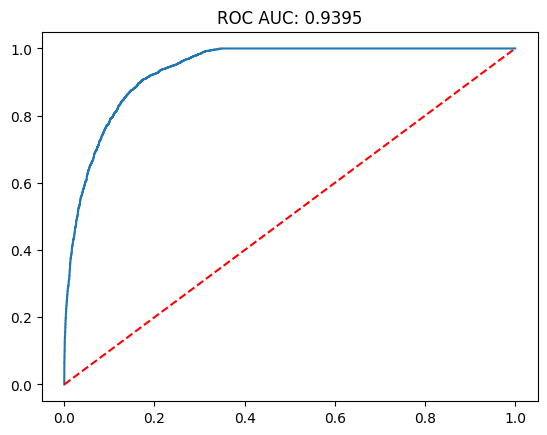

In [84]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_lr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_lr),4)}')
plt.show()

In [75]:
print(f"Model's Accuracy score: {accuracy_score(y_test,y_predh_lr)}")

Model's Accuracy score: 0.8417894970742907


### Random Forest Classifier using GridSearchCV

In [86]:
grid = {'max_depth':[5,6], 'min_samples_split':[8,9,10]}
gscv = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100), param_grid=grid, cv=5, scoring='roc_auc')
model_cv = gscv.fit(x_train_s,y_train_s)

In [87]:
model_cv.best_params_

{'max_depth': 6, 'min_samples_split': 10}

In [88]:
rf = RandomForestClassifier(n_estimators=100, max_depth= 6, min_samples_split=10)
model_rf = rf.fit(x_train_s,y_train_s)

In [90]:
y_preds_rf = model_rf.predict_proba(x_test)[:,1]
y_predh_rf  = (y_preds_rf>0.5).astype(int)

In [91]:
print(f'Confusion_Matrix: {confusion_matrix(y_test,y_predh_rf)}')
print(f'Precision_score: {precision_score(y_test,y_predh_rf)}')
print(f'Recall_score: {recall_score(y_test,y_predh_rf)}')
print(f'roc_auc_score: {roc_auc_score(y_test,y_predh_rf)}')

Confusion_Matrix: [[9355 1146]
 [ 382 2618]]
Precision_score: 0.6955366631243358
Recall_score: 0.8726666666666667
roc_auc_score: 0.8817671015458846


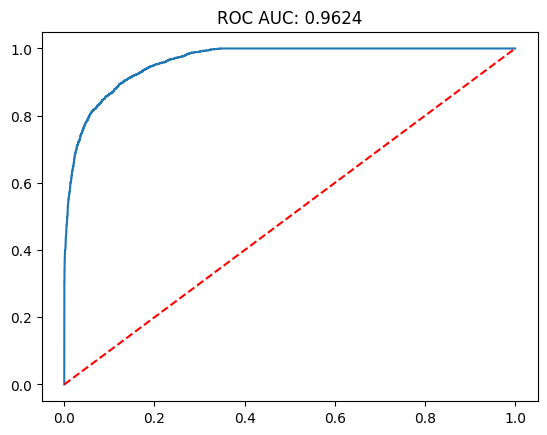

In [92]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_rf)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_rf),4)}')
plt.show()

In [94]:
cross_val_score(estimator=RandomForestClassifier(n_estimators=100, max_depth= 6, min_samples_split=10),X=x_train_s,y=y_train_s,cv=7, scoring='roc_auc' )

array([0.96570571, 0.96382179, 0.96983265, 0.97248459, 0.97320306,
       0.97592911, 0.97232791])

### XGBoost Classifier using GridSearchCV

In [95]:
grid1 = {'max_depth':[5,6], 'learning_rate':[0.1,0.2], 'gamma': [0.1,0.2,0.3]}
gscv1 = GridSearchCV(estimator=XGBClassifier(n_estimators=100), param_grid=grid1, cv=5, scoring='roc_auc')
model_cv1 = gscv1.fit(x_train_s, y_train_s)

In [96]:
model_cv1.best_params_

{'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 6}

In [97]:
xgb = XGBClassifier(n_estimators=100, **model_cv1.best_params_)
model_xgb = xgb.fit(x_train_s, y_train_s)

In [98]:
y_preds_xgb = model_xgb.predict_proba(x_test)[:,1]
y_predh_xgb = (y_preds_xgb>0.5).astype(int)

In [99]:
print(f'Confusion_Matrix: {confusion_matrix(y_test,y_predh_xgb)}')
print(f'Precision_score: {precision_score(y_test,y_predh_xgb)}')
print(f'Recall_score: {recall_score(y_test,y_predh_xgb)}')
print(f'roc_auc_score: {roc_auc_score(y_test,y_predh_xgb)}')

Confusion_Matrix: [[10080   421]
 [  541  2459]]
Precision_score: 0.8538194444444445
Recall_score: 0.8196666666666667
roc_auc_score: 0.8897876234009459


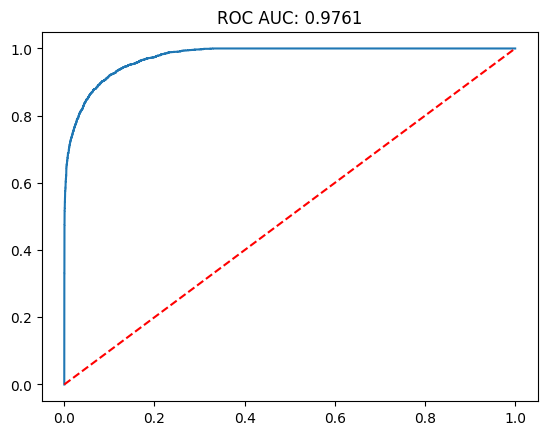

In [100]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_xgb)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_xgb),4)}')
plt.show()

In [101]:
cross_val_score(estimator=XGBClassifier(n_estimators=100,gamma= 0.2,learning_rate=0.2, max_depth=6),X=x_train_s,y=y_train_s,cv=7, scoring='roc_auc' )

array([0.97868173, 0.97764102, 0.98883378, 0.99723541, 0.99749878,
       0.99788935, 0.9975939 ])